# Homework Assignment 4

## Using the Perceptron, SVMs, and PCA with Seeds Data

### <p style="text-align: right;"> &#9989; ni kundargi</p>
### <p style="text-align: right;"> &#9989; git: ninikvn</p>

<img src="https://storage.googleapis.com/kaggle-datasets-images/33334/43825/05f9c10363dedcb3507c0c94a258e51c/dataset-cover.jpg?t=2018-06-26-04-03-17" width=400px align="right" style="margin-left: 20px" alt="Underwater naval mines">

### Goals for this homework assignment

By the end of this assignment, you should be able to:
* Use `git` and the branching functionality to track your work and turn in your assignment
* Read in data and prepare it for modeling
* Build, fit, and evaluate an SVC model of data
* Use PCA to reduce the number of important features
* Build, fit, and evaluate an SVC model of PCA-transformed data
* Train a perceptron and compare to SVC model

### Assignment instructions:

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **65 points** possible on this assignment. Point values for each part are included in the section headers.

This assignment is **due by 11:59 pm on Monday, December 2. It should be pushed to your repo (see Part 1) AND submitted to D2L**. 

#### Imports

It's useful to put all of the imports you need for this assignment in one place. Read through the assignment to figure out which imports you'll need or add them here as you go.

In [1]:
print("51")

51


In [2]:
import os # used to debug an error while importing seeds.tsv 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

---
## Part 1: Git Repo Management and Branching (6 points)

For this assignment, you're going to add it to the `cmse202-f24-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f24-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository.

3. Create a **new branch** called `hw04_branch`.

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

In [ ]:
!mkdir hw-04
!mv HW-04_PerceptronSVMandPCA-STUDENT.ipynb hw-04/
!git checkout -b hw04_branch
!git add hw-04/notebook.ipynb
!git commit -m "adding the hw04 notebook to the hw04_branch"
!git push origin hw04_branch

fatal: A branch named 'hw04_branch' already exists.
fatal: pathspec 'hw-04/notebook.ipynb' did not match any files
On branch hw04_branch
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   ../hw-02/.ipynb_checkpoints/HW-02_ABMandGraphTheory-STUDENT-checkpoint.ipynb
	deleted:    HW-04_PerceptronSVMandPCA-STUDENT.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../hw-02/edges.csv
	../hw-02/nodes.csv
	.ipynb_checkpoints/
	hw-04/
	seeds.tsv

no changes added to commit (use "git add" and/or "git commit -a")
Username for 'https://github.com': 

```bash
# Put your answer here
```

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f24-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04_branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
<a id="loading"></a>
## Part 2. Loading a the dataset: Seeds data (7 points)

The dataset contains information about seeds along with the type of seed.

The goal of this assignment is to use this dataset to practice using the Perceptron classifier, SVMs, and PCA tools we've covered in class. Since the goal of the assignment is to develop models, we have supplied a clean dataset without any missing values. 
 
#### The data

**&#9989; Do This:**  To get started, you'll need to download the associated `seeds.tsv` file:
`https://raw.githubusercontent.com/hoolagans/CMSE202_FS24/main/seeds.tsv`

Once you've downloaded the data, **open the files using a text browser or other tool on your computer and take a look at the data to get a sense of the information it contains.** If you are curious about this dataset it came from the following link [Seeds Data](https://www.kaggle.com/datasets/rwzhang/seeds-dataset).

### 2.1 Load the data

**&#9989; Task 2.1 (2 point):** Read the ```seeds.tsv``` file into your notebook. When loading in the dataset assign the following names to the features (["F1","F2","F3","F4","F5","F6","F7","Class"]). We're going to use "Class" column as the classes that we'll be trying to predict with our classification models.

Once you've loaded in the data, **display the DataFrame to make sure it looks reasonable**. You should have **8 columns** and **210 rows**.

In [3]:
# code wouldn't run unless i used the absolute file path for some reason
seeds = pd.read_csv('seeds.tsv', sep='\t', names=["F1", "F2", "F3", "F4", "F5", "F6", "F7", "Class"])
seeds.head()

,F1,F2,F3,F4,F5,F6,F7,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
print("there are this many rows & columns:", seeds.shape)

there are this many rows & columns: (210, 8)


### 2.2 Plotting the Data

**&#9989; Task 2.2 (2 points):** Use the seaborn pairplot function to view the distributions of the different classes across the different feature pairs. You should use the "hue" option to set the points to be colored based on the "Class" so you can easily identify the different class distributions. 

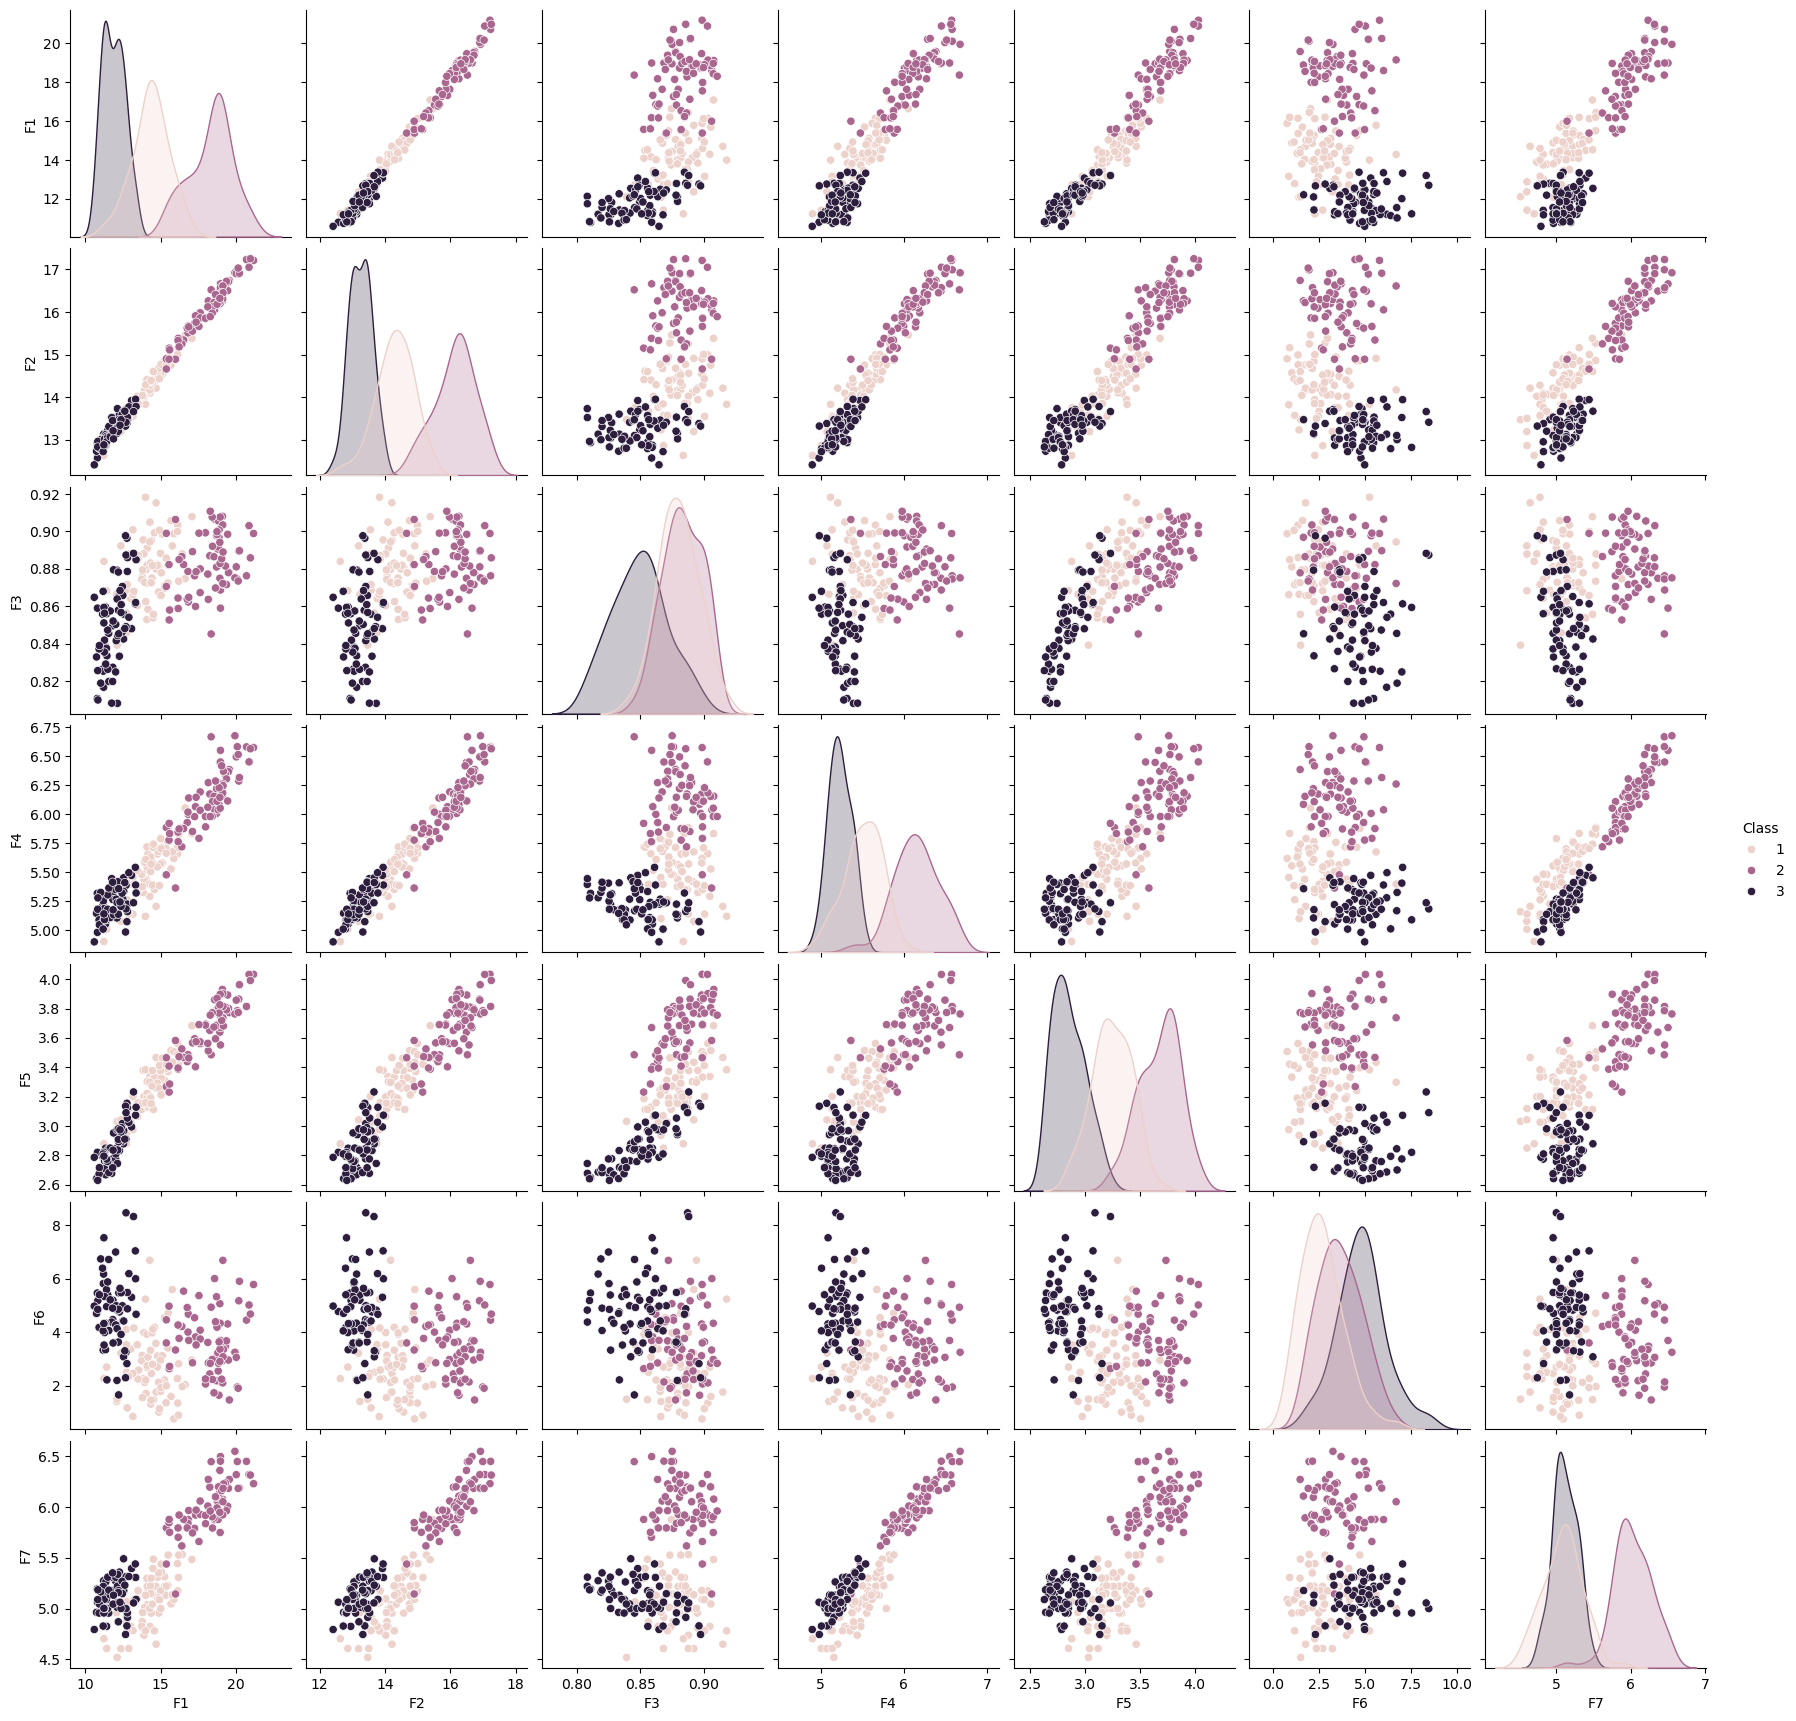

In [5]:
sns.pairplot(seeds, hue="Class")
plt.show()

&#9989; **Question 2.1 (2 point):** Looking at the plots, does it look like we should be able to reasonably find a classifier to separate the classes? Record your observations. 

**Based on the plots, it looks like we should reasonably be able to find a classifier to separate the classes: the graphs clearly display clustering patterns when comparing two features, which is what is necessary in finding a classifier. However,  classes may be more difficult to separate regarding particular graphs because there is a greater degree of overlap (e.g. F5/F6 or F6/F7) unlike the more distinct clustering patterns present in graphs like F1/F2 or F2/F4.**

### 2.3 Separating the "features" from the "labels"

As we've seen when working with `sklearn` it can be much easier to work with the data if we have separate variables that store the features and the labels.

**&#9989; Task 2.3 (1 point):** Split your DataFrame so that you have two separate DataFrames, one called `features`, which contains all of the seed features, and one called `labels`, which contains all of the integer "Class" labels. **Display both of these new DataFrames to make sure they look correct.**

In [7]:
seeds_features = seeds[["F1", "F2", "F3", "F4", "F5", "F6", "F7"]] # features DF: F1-F7 
seeds_labels = seeds["Class"] # labels DF: 1, 2, 3

print("here is the features dataframe from the overall features dataset:", seeds_features.head()) # check features DF
print("here is the labels dataframe from the overall seeds dataset:", seeds_labels.head()) # check labels DF 

here is the features dataframe from the overall features dataset:       F1     F2      F3     F4     F5     F6     F7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175
here is the labels dataframe from the overall seeds dataset: 0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


&#9989; **Question 2.2 (2 point):** How balanced are the classes? Does it matter for the set of classes to be balanced? Why or why not? (Include the code you used to determine this along with your written answer below.)

In [8]:
seedsperclass = seeds_labels.value_counts()

print("this is how many datapoints are in each class:")
print(seedsperclass)

this is how many datapoints are in each class:
Class
1    70
2    70
3    70
Name: count, dtype: int64


**It appears that the classes are perfectly balanced, with 70 datapoints in each of the three classes (code above). It is relatively important that the classes be balanced, because it ensures that when the SVC model is coded for later, the machine learning model has an equal amount of data from each class to learn from--hence, the model will perform equally accurately for the three classes when asked to form a prediction.**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## Part 3. Building an SVC model (5 points)

Now, to tackle this classification problem, we will use a support vector machine. Of course, we could easily replace this with any `sklearn` classifier we choose, but for now we will just use an SVC with a rbf kernel.

### 3.1 Splitting the data

But first, we need to split our data into training and testing data!

**&#9989; Task 3.1 (2 point):** Split your data into a training and testing set with a training set representing 70% of your data. For reproducibility , set the `random_state` argument to `12`. Print the lengths to show you have the right number of entries.

In [9]:
x_seeds_training, x_seeds_testing, y_seeds_training, y_seeds_testing = train_test_split(seeds_features, 
                                                                                        seeds_labels, 
                                                                                        test_size=0.3, 
                                                                                        random_state=12)

a = 210*0.7
b = 210*0.3

print("1. there are", len(x_seeds_training), "training samples.") # check entries count for training 
print("this is the correct number of entries because 70% of 210 is", a)

print("2. there are", len(x_seeds_testing), "testing samples.") # check entries count for testing 
print("this is the correct number of entries because 30% of 210 is", b)

1. there are 147 training samples.
this is the correct number of entries because 70% of 210 is 147.0
2. there are 63 testing samples.
this is the correct number of entries because 30% of 210 is 63.0


### 3.2 Modeling the data and evaluating the fit

As you have done this a number of times at this point, we ask you to do most of the analysis for this problem in one cell.

**&#9989; Task 3.2 (4 points):** Build a **rbf** kernel SVC model with `C=1.0`, fit it to the training set, and use the test features to predict the outcomes. Evaluate the fit using the **confusion matrix** and **classification report**.

**First Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [10]:
svc_seeds = SVC(kernel='rbf', C=1.0) # building an rbf kernel SVC model with C=1.0
svc_seeds.fit(x_seeds_training, y_seeds_training) # fitting the model to the training set 
y_seeds_predictions = svc_seeds.predict(x_seeds_testing) # using the test features to predict the outcomes 

# printing the confusion matrix: 
print("here is the confusion matrix:")
print(confusion_matrix(y_seeds_testing, y_seeds_predictions))

# printing the classification matrix: 
print("here is the classification matrix:")
print(classification_report(y_seeds_testing, y_seeds_predictions))

here is the confusion matrix:
[[18  0  4]
 [ 4 17  0]
 [ 2  0 18]]
here is the classification matrix:
              precision    recall  f1-score   support

           1       0.75      0.82      0.78        22
           2       1.00      0.81      0.89        21
           3       0.82      0.90      0.86        20

    accuracy                           0.84        63
   macro avg       0.86      0.84      0.84        63
weighted avg       0.85      0.84      0.84        63



&#9989; **Question 3.1 (1 point):** How accurate is your model? What evidence are you using to determine that? How many false positives and false negatives does it predict for each class?

**The classification matrix (evidence) in the previous code cell shows the overall accuracy to be 0.84, meaning 84% of the samples have been classified properly. This means that the model is moderately to highly accurate, and 84% of the data is a true positive/negative. I used the confusion matrix from the previous model to determine the the number of false positives, false negatives, true positives, and true negatives:**

**Class 1:**
- **True positives:** 18
- **False positives:** 6 
- **False negatives:** 4 
- **True negatives:** 35 

**Class 2:**
- **True positives:** 17
- **False positives:** 0 
- **False negatives:** 4 
- **True negatives:** 42

**Class 3:** 
- **True positives:** 18
- **False positives:** 4 
- **False negatives:** 2 
- **True negatives:** 35

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## Part 4. Finding and using the best hyperparameters (8 points)

At this point, we have fit one model and determined it's performance, but is it the best model? We can use `GridSearchCV` to find the best model (given our choices of parameters). Once we do that, we will use that "best" model for making predictions. 


### 4.1 Performing a grid search

**&#9989; Task 4.1 (4 points):** Using the following parameters `C` = `0.1`, `1.0`, `10.0`, `100.0`, `1000.0` and `gamma` = `0.01`, `0.1`, `1.0`, `10.0` for a `linear`, `rbf`, and `sigmoid` kernels use `GridSearchCV` with the `SVC()` model to find the best fit parameters. Once, you're run the grid search, print the "best params" that the grid search found (*hint*: there's an attribute associated with the GridSearchCV object that stores this information). Note that this code could take a while to run since it is repeatedly training your SVM. 

**I had to reference the documentation for GridSearchCV to answer the question below.**


**Citation/link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html**

In [11]:
parameters_seeds_grid = {
    'C': [0.1, 1.0, 10.0, 100.0, 1000.0],  # given parameters for C
    'gamma': [0.01, 0.1, 1.0, 10.0],       # given parameters for gamma
    'kernel': ['linear', 'rbf', 'sigmoid']} # given list of kernels

svc_seeds = SVC()  # initializing model 

grid_search = GridSearchCV( 
    estimator=svc_seeds, # svc_seeds should be the estimator                      
    param_grid=parameters_seeds_grid, # required hyperparameter testing from seeds data      
    scoring='accuracy') # used the accuracy argument from the documentation linked above for optimizing the model 
   
grid_search.fit(x_seeds_training, y_seeds_training) # using the training data for grid_search (fitting) 

print("the best parameters are", grid_search.best_params_)  # printing out the best hyperparameters

the best parameters are {'C': 100.0, 'gamma': 0.01, 'kernel': 'linear'}


&#9989; **Question 4.1 (1 point):** How do the "best params" results of the grid search compare to what you used in Part 3? Did the hyper parameter(s) change? What kernel did the grid search determine was the best option? 

**The fact that the best parameters from the grid search are different from the predictions using the rbf kernel is an indication that the linear kernel is more accurate. The former has a higher C value so a more strict decision boundary was used. Additionally, when I printed the accuracy for the grid search function, it came out to approximately 96%, while it came out to only about 84% for the rbf kernel.**


### 4.2 Evaluating the best fit model

Now that we have found the "best params", let's determine how good the fit is.

**&#9989; Task 4.2 (2 points):** Use the test features to predict the outcomes for the best model. Evaluate the fit using the **confusion matrix** and **classification report**.

**Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [12]:
y_best_predictions = grid_search.best_estimator_.predict(x_seeds_testing)

print("here is the confusion matrix", confusion_matrix(y_seeds_testing, y_best_predictions))
print("here is the classification report/matrix:", classification_report(y_seeds_testing, y_best_predictions))

here is the confusion matrix [[19  1  2]
 [ 2 19  0]
 [ 1  0 19]]
here is the classification report/matrix:               precision    recall  f1-score   support

           1       0.86      0.86      0.86        22
           2       0.95      0.90      0.93        21
           3       0.90      0.95      0.93        20

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.90        63



&#9989; **Question 4.2 (1 point):** How accurate is this "best" model? What evidence are you using to determine that? How many false positives and false negatives does it predict?

**According to the classification report, the new "best" model has a high accuracy of 90%. Based on the confusion matrix, for Class 1, there are two false positives and three false negatives; class 2 has one false positive and two false negatives; & class 3 has two false positives and one false negative.**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 4", and push the changes to GitHub.

---

---
## Part 5. Using Principal Components (13 points)

The full model uses all 6 features to predict the results and you likely found that the model is decently accurate using all 6 features, but not perfect. **Could we get the same level of accuracy (or better) using fewer features?** When datasets start to get very large and complex, applying some sort of **feature reduction** method can reduce the computational resources needed to train the model and, in some case actually improve the accuracy.

When performing feature reduction, one could simply try to identify which features seem most important and drop the ones that aren't, but performing a Principal Component Analysis (PCA) to determine the features that contribute the most to the model (through their accounted variance) can be more effective.

### 5.1 Running a Principle Component Analysis (PCA)

Since we have 7 total features to start with, let's see how well we can do with just 1 feature. Reduce the feature count to **1** principle components. We'll see how well we can predict the classes of the seeds dataset with just **1 feature**!

**&#9989; Task 5.1 (3 points):**  Using `PCA()` and the associated `fit()` method, run a principle component analysis on your training features using 1 component. Transform both the test and training features using the result of your PCA. Print the `explained_variance_ratio_`.

In [13]:
pca = PCA(n_components=1)
x_seeds_training_pca = pca.fit_transform(x_seeds_training)
x_seeds_testing_pca = pca.transform(x_seeds_testing)

print("the explained variance ratio is:", pca.explained_variance_ratio_)

the explained variance ratio is: [0.83031021]


&#9989; **Question 5.1 (1 point):** What is the total explained variance ratio captured by this simple 1-component PCA? How well do you think a model with just 1 feature will perform? Why?

**The explained variance ratio is approximately .8303: this indicates that about 83.03% of the variance present in the dataset has been captured by the single component PCA. Because 0.83 is relatively high, the model with just 1 feature should perform well.**

### 5.2 Fit and Evaluate an SVC model

Using the PCA transformed features, we need to train and test a new SVC model. You'll want to perform the `GridSearchCV` again since there may a better choice for the kernel and the hyper-parameters.

**&#9989; Task 5.2 (2 points):**  Using the PCA transformed training data, build and train an SVC model using the `GridSearchCV` tool to make sure you're using the best kernel and hyper-parameter combination. Predict the classes using the PCA transformed test data. Evaluate the model using the classification report, and the confusion matrix.

In [14]:
parameters_seeds_pca_grid = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                            'gamma': [0.01, 0.1, 1.0, 10.0],
                            'kernel': ['linear', 'rbf', 'sigmoid']}

svc_seeds_pca = SVC()  

grid_search_pca = GridSearchCV(
    estimator=svc_seeds_pca,
    param_grid=parameters_seeds_pca_grid)
  
grid_search_pca.fit(x_seeds_training_pca, y_seeds_training)

print("the best pca features are:", grid_search_pca.best_params_)
y_pca_best_predictions = grid_search_pca.best_estimator_.predict(x_seeds_testing_pca)

print("here is the pca model's confusion matrix:", confusion_matrix(y_seeds_testing, y_pca_best_predictions))
print("here is the pca model's classification matrix:", classification_report(y_seeds_testing, y_pca_best_predictions))

the best pca features are: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
here is the pca model's confusion matrix: [[17  1  4]
 [ 5 16  0]
 [ 0  0 20]]
here is the pca model's classification matrix:               precision    recall  f1-score   support

           1       0.77      0.77      0.77        22
           2       0.94      0.76      0.84        21
           3       0.83      1.00      0.91        20

    accuracy                           0.84        63
   macro avg       0.85      0.84      0.84        63
weighted avg       0.85      0.84      0.84        63



&#9989; **Question 5.2 (1 point):** How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the full feature model?

<font size=+3>&#9998;</font> **Looking at weighted averages, the model has an overall accuracy of 84%. Additionally, this model is 85% precise, has 84% recall, has an f1 score of 84%, and has a support score of 63. From the confusion matrix, we know that there are ten false positives and ten false negatives. Generally, because the different parameters calculating for accuracy fall within the same range (84% to 85%), we can conclude that the model is fairly accurate and tends to perform consistently across all classes. However, it is important to note that the full feature model has an accuracy of 90%: hence although this new model is significantly simpler because of the single feature, this is at the cost of better performance.**

### 5.3 Repeat your analysis with more components

You probably found that the model with 1 feature didn't actually do too bad, which is great given how few features we're using, but it's still not as good as just using all of the feature. Can we do better?

What if we increase the number of principle components to **4**? What happens now?

**&#9989; Task 5.3 (2 points):** Repeat your analysis from 5.1 and 5.2 using **4 components** instead. As part of your analysis, **print the total explained variance ratio as well as the sum of these values**.

In [15]:
pca_four_components = PCA(n_components=4)
x_seeds_training_pca_four_components = pca_four_components.fit_transform(x_seeds_training)
x_seeds_testing_pca_four_components = pca_four_components.transform(x_seeds_testing)


print(f"the explained variance ratio for the four components is {pca_four_components.explained_variance_ratio_} and the sum of these values is {sum(pca_four_components.explained_variance_ratio_)}")

parameters_seeds_pca_four_grid = {'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
                                    'gamma': [0.01, 0.1, 1.0, 10.0],
                                    'kernel': ['linear', 'rbf', 'sigmoid']}
svc_seeds_pca_four = SVC() 
grid_search_pca_four = GridSearchCV(
    estimator=svc_seeds_pca_four,
    param_grid=parameters_seeds_pca_four_grid,
    scoring='accuracy',
)

grid_search_pca_four.fit(x_seeds_training_pca_four_components, y_seeds_training)

print("i found the best parameters for four components to be", grid_search_pca_four.best_params_)
y_pca_four_best_predictions = grid_search_pca_four.best_estimator_.predict(x_seeds_testing_pca_four_components)

print("confusion matrix, 4 component model:")
conf_matrix_pca_four = confusion_matrix(y_seeds_testing, y_pca_four_best_predictions)
print(conf_matrix_pca_four)

print("classification report, 4 component model:")
class_report_pca_four = classification_report(y_seeds_testing, y_pca_four_best_predictions)
print(class_report_pca_four)

the explained variance ratio for the four components is [8.30310206e-01 1.63431870e-01 5.26222757e-03 6.83162800e-04] and the sum of these values is 0.9996874663746689
i found the best parameters for four components to be {'C': 100.0, 'gamma': 0.01, 'kernel': 'linear'}
confusion matrix, 4 component model:
[[19  1  2]
 [ 3 18  0]
 [ 1  0 19]]
classification report, 4 component model:
              precision    recall  f1-score   support

           1       0.83      0.86      0.84        22
           2       0.95      0.86      0.90        21
           3       0.90      0.95      0.93        20

    accuracy                           0.89        63
   macro avg       0.89      0.89      0.89        63
weighted avg       0.89      0.89      0.89        63



&#9989; **Question 5.3 (4 point):** What is the total explained variance ratio captured by this PCA? How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the 1 PCA component model? To the full feature model?

**Based on the output from the previous question, we can see that the total explained variance ratio captured from the four component model is 0.9997 (meaning about 99.97% variance in the data is captured by analysis of these four components): this is very highly accurate and is logically more accurate than the previous model with only 83.03% of the variance being captured with one component. This model is 89% accurate according to the classification report, a 5% increase of the one component model with an accuracy of about 84%. 
This model has three false negatives and one false positive for class 1, two false negatives for class 2, and one false negative for class 3. This is a total of seven false results (positives and negatives combined), a notable improvement over the one component model which reports twenty false results.
Though this model is not as good as the full-feature model which had a reported accuracy of 90%, the four-component model is still reliable in that it is significantly closer in accuracy to the full-feature model than the one-component model.**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 5", and push the changes to GitHub.

---

---
## Part 6. How well does PCA work? (14 points)

Clearly, the number of components we use in our PCA matters. Let's investigate how they matter by systematically building a model for any number of selected components. While this might seem a bit unnecessary for such a relatively small dataset, **this can be very useful for more complex datasets and models!**

### 6.1 Accuracy vs. Components

To systematically explore how well PCA improves our classification model, we will do this by writing a function that creates the PCA, the SVC model, fits the training data, predict the labels using test data, and returns the accuracy scores and the explained variance ratio. So your function will take as input:
* the number of requested PCA components
* the training feature data
* the testing feature data
* the training data labels
* the test data labels

and it should **return** the accuracy score for an SVC model fit to pca transformed features and the **total** explained variance ratio (i.e. the sum of the explained variance for each component).

**&#9989; Task 6.1 (4 points):** Create this function, which you will use in the next section.

In [18]:

def pca_svc_accuracy_with_grid_search(n_components, x_training, x_testing, y_training, y_testing):
    pca = PCA(n_components=n_components)
    x_training_pca = pca.fit_transform(x_training)
    x_testing_pca = pca.transform(x_testing)
    total_explained_variance_ratio = sum(pca.explained_variance_ratio_)
    
    parameters_grid = {
        'C': [0.1, 1.0, 10.0, 100.0, 1000.0],
        'gamma': [0.01, 0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf', 'sigmoid']}
    svc = SVC()
    grid_search = GridSearchCV(
        estimator=svc,
        param_grid=parameters_grid,
        scoring='accuracy')
    
    grid_search.fit(x_training_pca, y_training)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_predictions = best_model.predict(x_testing_pca)
    accuracy = accuracy_score(y_testing, y_predictions)
    conf_matrix = confusion_matrix(y_testing, y_predictions)
    class_report = classification_report(y_testing, y_predictions)
    
    return accuracy, total_explained_variance_ratio, best_params, conf_matrix, class_report


### 6.2 Compute accuracies

Now that you have created a function that returns the accuracy for a given number of components, we will use that to plot the how the accuracy of your SVC model changes when we increase the number of components used in the PCA.

**&#9989; Task 6.2 (2 points):** Going from **1 to 7** components, use your function above to compute and store (as a list) the accuracy of your models and the total explained variance ratio of your models.

**Note**: you'll be running many grid searches to do this, so it might take your computer a bit of time to run all of these models. Please be patient. It shouldn't more than a couple minutes!

In [19]:
accuracies = []
explained_variance_ratios = []

for n_components in range(1, 8):
    print(f"pca w/ {n_components} components:")
    accuracy, variance_ratio, _, _, _ = pca_svc_accuracy_with_grid_search(
        n_components, x_seeds_training, x_seeds_testing, y_seeds_training, y_seeds_testing)
    accuracies.append(accuracy)
    explained_variance_ratios.append(variance_ratio)

print("accuracies", accuracies)
print("explained variance ratios", explained_variance_ratios)


pca w/ 1 components:
pca w/ 2 components:
pca w/ 3 components:
pca w/ 4 components:
pca w/ 5 components:
pca w/ 6 components:
pca w/ 7 components:
accuracies [0.8412698412698413, 0.8412698412698413, 0.8253968253968254, 0.8888888888888888, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048]
explained variance ratios [0.8303102056278363, 0.9937420760055138, 0.9990043035747432, 0.9996874663746689, 0.9998763078189219, 0.9999975140249907, 1.0]


### 6.3 Plot accuracy vs number of components

Now that we have those numbers, it makes sense to look at the accuracy vs # of components.

**&#9989; Task 6.3 (2 points):** Plot the accuracy vs # of components.

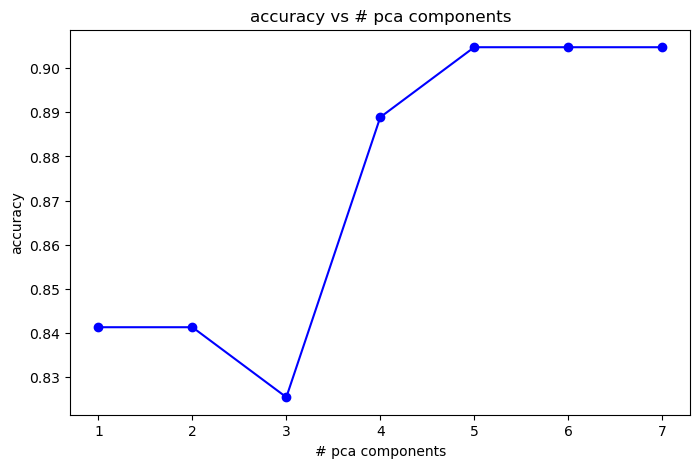

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), accuracies, marker='o', linestyle='-', color='b')
plt.title('accuracy vs # pca components')
plt.xlabel('# pca components')
plt.ylabel('accuracy')
plt.xticks(range(1, 8)) 
plt.show()


**&#9989; Question 6.1 (3 point):** What do you observe about the accuracy as a function of the number of PCA components you use? One goal of using dimension reduction strategies is to develop a model with the fewest features while maximizing the accuracy. Given that motivation, what number of principal components would you choose and why?  

<font size=+3>&#9998;</font> The model is stable for 1-2 components and drops at 3, before quickly rising to 4 components. Because of the stabilization after 4, I would choose 4 (at 89% accuracy) because it has the highest accuracy while being in the stable range and maintaining simplicity.

### 6.4 Plot total explained variance vs number of components

What if we look at total explained variance as a function of # of components?

**&#9989; Task 6.4 (2 points):** Plot the total explained variance ratio vs # of components. 

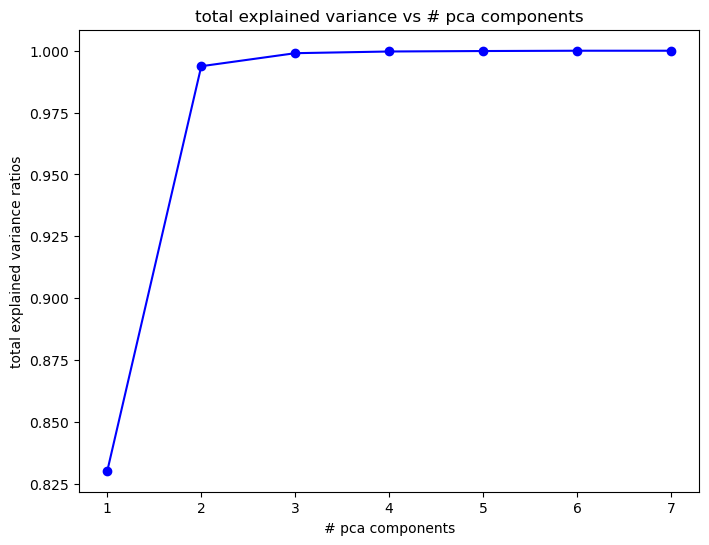

In [23]:
num_components = range(1, 8) 
explained_variance_ratios = []

for n in num_components:
    pca = PCA(n_components=n)
    pca.fit(x_seeds_training) 
    explained_variance_ratios.append(sum(pca.explained_variance_ratio_))  # Store the total explained variance ratio

plt.figure(figsize=(8, 6))
plt.plot(num_components, explained_variance_ratios, marker='o', linestyle='-', color='b')
plt.title('total explained variance vs # pca components')
plt.xlabel('# pca components')
plt.ylabel('total explained variance ratios')
plt.xticks(num_components)
plt.show()


**&#9989; Question 6.2 (1 points):** Based on your answer from question 6.1 and the plot above, what is the explained variance for the number of principal components that you chose?

<font size=+3>&#9998;</font> The explained variance for four components is approximately 100%. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 6", and push the changes to GitHub.

---

---
## 7. Revisiting the Perceptron classifier (10 points)

In class you implemented your own perceptron class. Fortunately, there is a perceptron classifier already built into scikit learn, so in this portion of the assignment we will be exploring scikit learn's perceptron


&#9989; **Do this**: 
Run the following cell to import the code from the Perceptron class.

In [24]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # included for reference 

**&#9989; Task 7.1 (4 points):** Create an instance of the `Perceptron` object using **alpha=0.001** and **penalty='l2'**. Then, use the `fit()` to train the classifier using the training features and labels from the seeds dataset you've been using in the assignment up to this point. Finally, use the `predict()` method to predict the labels for the test features and print the accuracy score.

In [25]:
perceptron = Perceptron(alpha=0.001, penalty='l2')
perceptron.fit(x_seeds_training, y_seeds_training) # fitting to training data 
y_predictions_data = perceptron.predict(x_seeds_testing) # predictions on test data 
accuracy_perceptron = accuracy_score(y_seeds_testing, y_predictions_data) # accuracy calculation 

# printing results
print(f"the perceptron's accuracy is {accuracy_perceptron}")
print(f"here is the confusion matrix: {confusion_matrix(y_seeds_testing, y_predictions_data)} and the classification report {classification_report(y_seeds_testing, y_predictions_data)}")

the perceptron's accuracy is 0.5238095238095238
here is the confusion matrix: [[ 3 19  0]
 [ 0 21  0]
 [ 3  8  9]] and the classification report               precision    recall  f1-score   support

           1       0.50      0.14      0.21        22
           2       0.44      1.00      0.61        21
           3       1.00      0.45      0.62        20

    accuracy                           0.52        63
   macro avg       0.65      0.53      0.48        63
weighted avg       0.64      0.52      0.47        63



**&#9989; Question 7.1 (1 points):** How well of job did the Perceptron classifier do classifying this datset? How does it compare to the SVC model you built in the previous parts of this assignment?

<font size=+3>&#9998;</font> For class 1, 3/22 were correctly classified; for class 2, 21/21 were correctly classified; and for class 3 9/20 were correctly classified. 
Precision, recall, and F1-scores for Class 1 and Class 3 are low (especially recall for Class 1, at 0.14). Class 2 performs the best, with perfect recall but slightly lower precision.

**&#9989; Task 7.2 (4 points):** Now perform a grid search as you did with the support vector classifier earlier in this assignment. Here you will want to search over `penalty` = `l2`, `l1`, `elasticnet` and `alpha`= `0.0001`, `0.001`, `0.01`, and `0.1`. Find and return the best parameters, the confusion matrix, and the classification report. 

In [26]:
parameters_perceptron = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

perceptron = Perceptron()

grid_search_perceptron = GridSearchCV(
    estimator=perceptron,
    param_grid=parameters_perceptron,
    scoring='accuracy')

grid_search_perceptron.fit(x_seeds_training, y_seeds_training)
print("best parameters:", grid_search_perceptron.best_params_)
y_perceptron_best_predictions = grid_search_perceptron.best_estimator_.predict(x_seeds_testing)

conf_matrix = confusion_matrix(y_seeds_testing, y_perceptron_best_predictions)
class_report = classification_report(y_seeds_testing, y_perceptron_best_predictions)
accuracy = accuracy_score(y_seeds_testing, y_perceptron_best_predictions)

print("confusion matrix:", conf_matrix)
print("classification report:", class_report)
print("accuracy:", accuracy)

best parameters: {'alpha': 0.0001, 'penalty': 'l1'}
confusion matrix: [[ 8 10  4]
 [ 0 21  0]
 [ 3  0 17]]
classification report:               precision    recall  f1-score   support

           1       0.73      0.36      0.48        22
           2       0.68      1.00      0.81        21
           3       0.81      0.85      0.83        20

    accuracy                           0.73        63
   macro avg       0.74      0.74      0.71        63
weighted avg       0.74      0.73      0.70        63

accuracy: 0.7301587301587301


**&#9989; Question 7.2 (1 point):** How do these results compare to the results when using a support vector classifier now that we optimized the parameters? Did the perceptron do better or worse? 

<font size=+3>&#9998;</font> The Perceptron improved w/ optimization but didn't do better than the SVC in terms of accuracy, meaning the SVC is still the better-performing model here. The optimized classifier had an overall accuracy of 73%, precision 73%, recall 73%, and F-1 70% considering the weighted average, lower than the 89% from the SVC

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 7", and push the changes to GitHub.

---

---
## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw04_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

### Congratulations, you're done!
Submit this assignment by uploading it to the course Desire2Learn web page. Go to the "Homework Assignments" folder, find the submission folder for Homework 4, and upload your notebook.

&#169; Copyright 2024,  Department of Computational Mathematics, Science and Engineering at Michigan State University